In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.isnull().sum() #checkfor the missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#handling missing value
data = data.drop(columns='Cabin', axis=1) #as cabin column has not that much importance 

In [6]:
data['Age'].fillna(data['Age'].mean(), inplace=True) #replacing age with mean values

In [7]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True) #replacing missing values of embarkes column with mode values

In [8]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

there is no missing vaues

In [9]:
data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True) #converting the string type categorial into integer type categorial columns

In [10]:
#droppingcolumns that are of not much importance
data= data.drop(columns = ['PassengerId','Name','Ticket'],axis=1)

In [11]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0
887,1,1,1,19.000000,0,0,30.0000,0
888,0,3,1,29.699118,1,2,23.4500,0
889,1,1,0,26.000000,0,0,30.0000,1


now our dataset has 891 rows and 8 coulumns

In [12]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


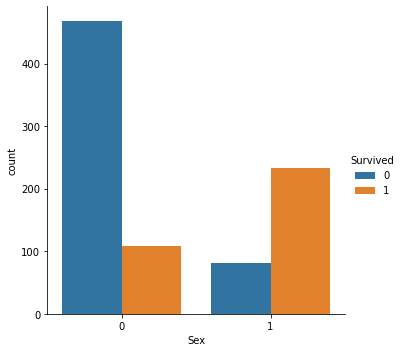

In [13]:
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = data)

from this graph we see that, the survival rate of male is less than that of females. so this "sex" feature is important

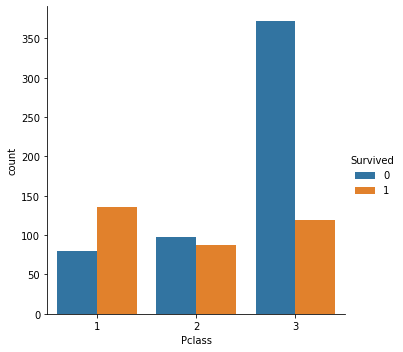

In [14]:
#ordinal feature vs "survived"
sns.catplot(x ="Pclass", hue ="Survived",
kind ="count", data = data)

higher class has more survival chances i.e. class1 passengers has more survival chance than that of class2and class3 passengers

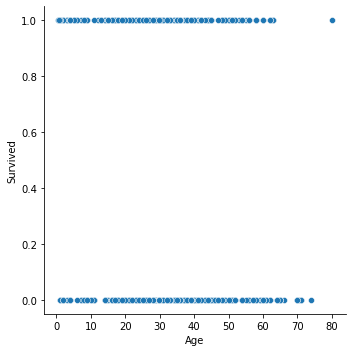

In [15]:
sns.relplot(x='Age',y='Survived', data= data)
plt.show()

from this graph, we see that, survival chance is good for children and aged between 20-50.

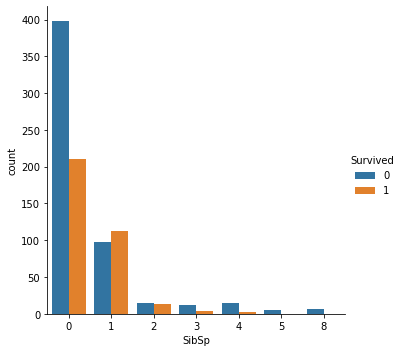

In [16]:
sns.catplot(x ="SibSp", hue ="Survived",   #sibspmeans no. of siblings and parch means no. parents/children aborded
kind ="count", data = data)

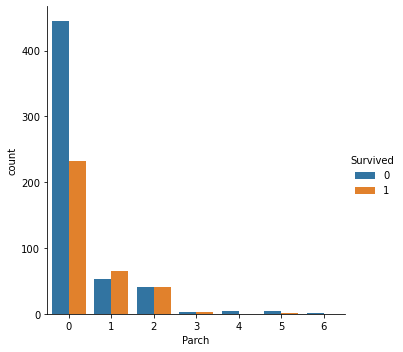

In [17]:
sns.catplot(x ="Parch", hue ="Survived",   
kind ="count", data = data)

from these graphs we observe that, survival chance decreases with number of family size.

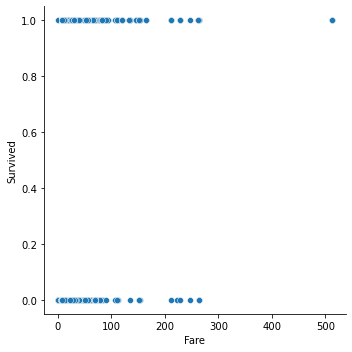

In [18]:
sns.relplot(x='Fare',y='Survived', data= data)
plt.show()

<AxesSubplot:xlabel='Fare_Range', ylabel='Survived'>

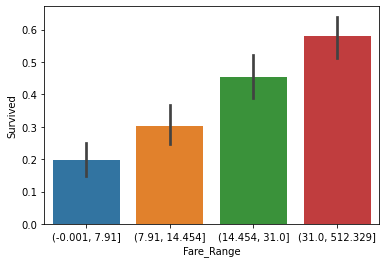

In [19]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
 
sns.barplot(x ='Fare_Range', y ='Survived',
data = data)

it can be concluded that, if the fare is high, survival chance was also high.

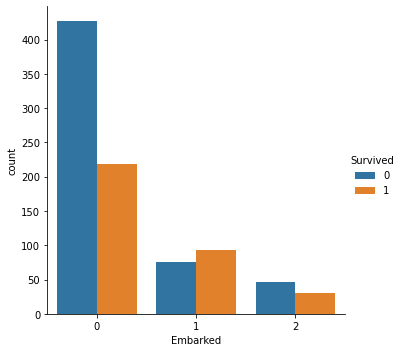

In [20]:
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', data = data)

category 0 and 1 has more survival chance.

so, all these features contribute to the label.

In [21]:
X = data.drop(columns = ['Survived', 'Fare_Range'],axis=1)
Y = data['Survived']

In [22]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [25]:
scaler= StandardScaler()    #standardization
X_scaled= scaler.fit_transform(X)

In [26]:
#splitinto train and test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [27]:
model = LogisticRegression()

In [28]:
model.fit(X_train, Y_train)

LogisticRegression()

In [29]:
X_train_prediction = model.predict(X_train)

In [30]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [31]:
print('accuracy score of train data:',classification_report(Y_train,X_train_prediction))

accuracy score of train data:               precision    recall  f1-score   support

           0       0.83      0.87      0.85       449
           1       0.76      0.70      0.73       263

    accuracy                           0.81       712
   macro avg       0.80      0.79      0.79       712
weighted avg       0.81      0.81      0.81       712



In [32]:
X_test_prediction = model.predict(X_test)

In [33]:
print('accuracy score of test data:',classification_report(Y_test,X_test_prediction))

accuracy score of test data:               precision    recall  f1-score   support

           0       0.75      0.91      0.82       100
           1       0.84      0.62      0.72        79

    accuracy                           0.78       179
   macro avg       0.80      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179



here, we see that the accuract of train data is 81% and test data is 78%. so both are nearly same. hence, our model is accurate.

In [35]:
#arbitary passenger prediction
prediction= model.predict(scaler.transform([[3,0,35,0,0,8.05,0]]))
    
print('chance of survival is:',prediction)
if prediction[0]==0:
    print("dead")
if prediction[0]==1:
    print("alive")

chance of survival is: [0]
dead


In [36]:
import pickle

In [37]:
pickle.dump( model, open('titanic_dataset','wb'))

In [38]:
loaded_model= pickle.load(open('titanic_dataset', 'rb'))